<a href="https://colab.research.google.com/github/suhanee19/ImageRecognition-CatOrDog-/blob/main/imageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suhani109","key":"ad6fc86936c994e0f36012342d73d53b"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [13]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: (x_train.shape), Test shape: (x_test.shape)")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (x_train.shape), Test shape: (x_test.shape)


In [14]:
x_train=x_train/ 255.0
x_test=x_test/ 255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train shape: {(x_train.shape)}")

Train shape: (60000, 28, 28, 1)


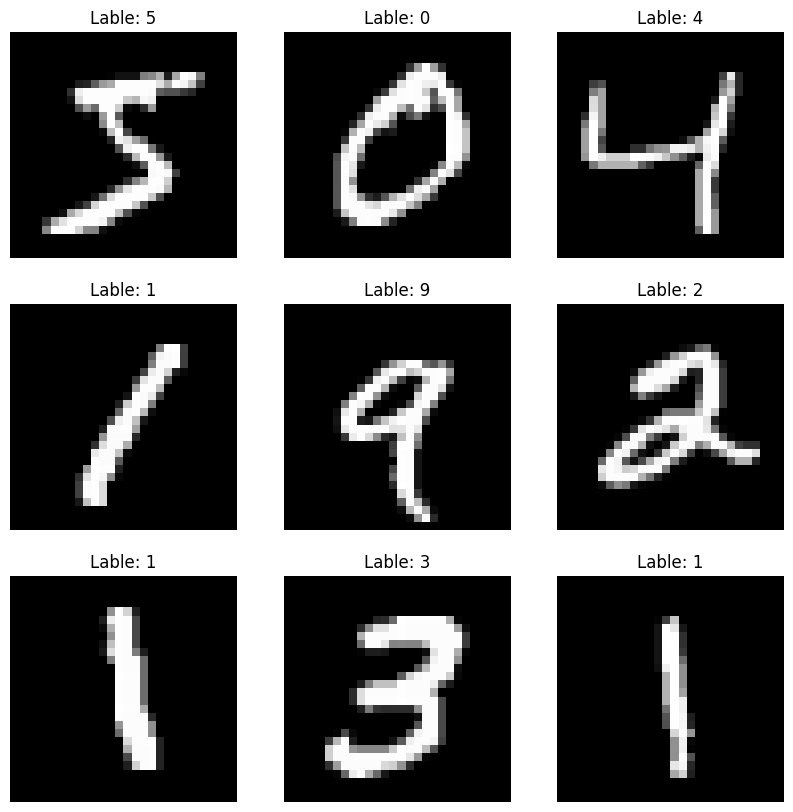

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Lable: {y_train[i]}")
  plt.axis('off')
plt.show()

In [16]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/ 255.0
x_test_c10=x_test_c10/ 255.0
print(f"CIFAR-10 train shape: {(x_train_c10.shape)}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    # 28 - 28 pixel and greyscale, action only focuses on +ve value
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')]
    #activation softmax coverts into probability
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(x_train,y_train,epochs=5, batch_size=32, validation_split=0.2)
#model will learn 32 pics at atime, v_split is testing data (20%)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8934 - loss: 0.3420 - val_accuracy: 0.9831 - val_loss: 0.0597
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9850 - loss: 0.0513 - val_accuracy: 0.9833 - val_loss: 0.0541
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9864 - val_loss: 0.0446
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9901 - val_loss: 0.0342
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9893 - val_loss: 0.0360


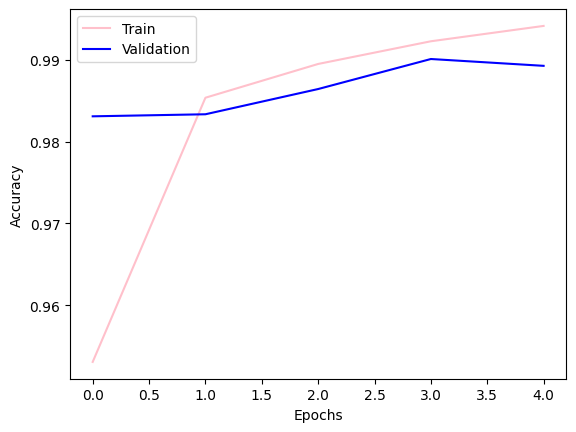

In [19]:
plt.plot(history.history['accuracy'],label='Train', color='pink')
plt.plot(history.history['val_accuracy'],label='Validation', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc: 4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.0373
Test accuracy:  0.990100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    # 28 - 28 pixel and greyscale, action only focuses on +ve value
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')]
    #activation softmax coverts into probability
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#creates images using give to train more
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,

)
datagen.fit(x_train_c10)

In [23]:
from tensorflow.keras.layers import BatchNormalization
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')

    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 80ms/step - accuracy: 0.3576 - loss: 1.8829 - val_accuracy: 0.4922 - val_loss: 1.4238
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5170 - loss: 1.3573 - val_accuracy: 0.4962 - val_loss: 1.4941
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5769 - loss: 1.2092 - val_accuracy: 0.6156 - val_loss: 1.0880
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.6080 - loss: 1.1255 - val_accuracy: 0.6138 - val_loss: 1.1211
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6246 - loss: 1.0646 - val_accuracy: 0.6480 - val_loss: 1.0081
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6405 - loss: 1.0225 - val_accuracy: 0.6672 - val_loss: 0.9565
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.6605 - loss: 0.9840 - val_accuracy: 0.6934 - val_loss: 0.8796
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6673 - lo

newer model will process 32/32 pic and colored images , after being able to do 28/28, this data changes constanlty , non same images are given differnt angles , diffrent positions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1000
           1       0.77      0.92      0.84      1000
           2       0.79      0.49      0.60      1000
           3       0.65      0.44      0.52      1000
           4       0.65      0.71      0.68      1000
           5       0.74      0.53      0.62      1000
           6       0.74      0.84      0.79      1000
           7       0.62      0.88      0.73      1000
           8       0.84      0.81      0.82      1000
           9       0.67      0.89      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.71     10000
weighted avg       0.73      0.72      0.71     10000



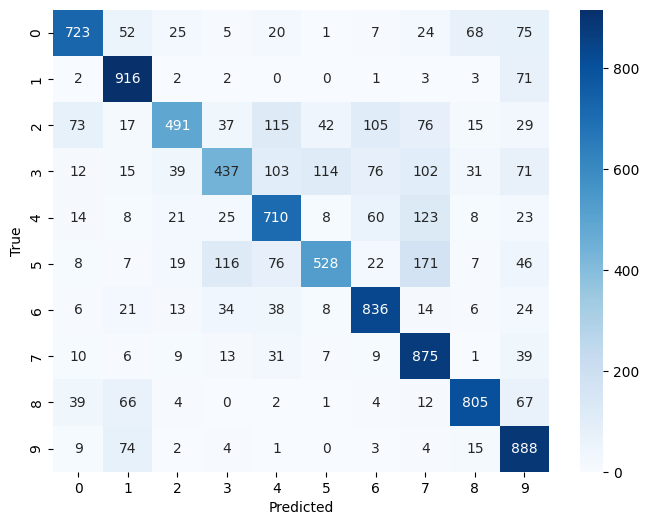

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 208M/218M [00:00<00:00, 433MB/s] 
100% 218M/218M [00:00<00:00, 450MB/s]


In [26]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/cat-and-dog')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2 )
train_generator=datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset='training'
)
validation_generator=datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=validation_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9372 - loss: 0.1988 - val_accuracy: 0.9813 - val_loss: 0.0633
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9801 - loss: 0.0583 - val_accuracy: 0.9831 - val_loss: 0.0559
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9817 - loss: 0.0500 - val_accuracy: 0.9825 - val_loss: 0.0503
Epoch 4/5
187/201 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9858 - loss: 0.0403

In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=validation_generator)

In [ ]:
model.save('mobilenet_cats_dogs.h5')
#loading
import tensorflow as tf
model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=model.predict(validation_generator)
fpr,tpr,_=roc_curve(validation_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC = {:.3f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import